# Modeleren van een rupsenuitbraak met de exponentiële vergelijking

Ecologen bestuderen hoe levende organismen interageren met andere levende organismen en met hun omgeving. Eén van de meest fundamentele vragen die ze proberen te beantwoorden is hoe een populatie van dieren, planten, bacteriën of mensen veranderd doorheen de tijd. Groeit ze? Daalt ze? Stagneert ze? Gaat de populatie op en neer? Kan ze plots imploderen? Dit soort vragen beantwoorden ecologen aan de hand van groeimodellen, wiskundige vergelijkingen die de (verwachte) groei doorheen de tijd voorstellen. In dit hoofdstuk bekijken we twee heel eenvoudige groeimodellen: exponentiële groei en logistische groei. We zullen leren hoe we het gedrag van deze modellen kunnen inschatten. Een van deze modellen heeft een verrassende eigenschap: ze kan chaotisch zijn, in bepaalde waarden is ze totaal onvoorspelbaar.

## Ontmoet de buxusmot

Vele insecten zijn nuttig, maar velen zijn ook ook plagen die de planten opvreten. Zo is de rups van de buxusmot (Cydalima perspectalis) een nachtmerrie voor elke tuinier met een mooie buxushaag. De buxusmot is een invasieve soort in Europa met een grote economische kost.

![Buxus](files/buxus.png "Buxus")

Omdat deze rups zo schadelijk is, zijn ecologen en gewasbeschermers erg geïnteresseerd om de de groei van populaties op te volgen en te modeleren. Wiskundige modellen helpen hen in te schatten of de populatie tot een aanvaardbare grootte blijft of wanneer ze dreigt uit haar voegen te treden en bestrijding nodig is.

Bestrijding kan als volgt:

- Insecticiden als cypermethrine en deltamethrine zijn efficiënt, maar moeten grondig aangebracht worden aan de binnenkant van de haag en onder bladeren

- Bacillus thuringiensis bacterie als biologische bestrijding

- Formonenvallen

## Veronderstellingen van ons model

Een wiskundig model is altijd een vereenvoudiging van de werkelijkheid (FN: een fotomodel is dan weer een idealisering van de werkelijkheid). Hier zullen we de rupsenpopulatie modeleren in perfecte, niet-overlappende generaties. We gebruiken de notatie $x_t$ om de populatiegrootte voor te stellen op generatie of tijdstip $t$. Hier neemt $t$ de waarden $0, 1, 2, 3, \ldots$ aan. Ons doel is om een reeks te bekomen die te populatiegrootte doorheen de tijd voorstelt:

$$x_0, x_1, x_2, \ldots, x_{t - 1}, x_t, \ldots$$

Hier is $x_0$ de initiële populatiegrootte, het aantal rupsen op het begin van de metingen.

Wat we willen bekomen is een regel die ons vertelt wat de populatiegroote op tijdstip $t$ (dus $x_t$) is, gegeven dat we weten hoeveel rupsen er zijn op tijdstip $t - 1$ (dus $x_{t - 1}$). We maken drie veronderstellingen voor zo'n regel:

- We gaan ervan uit dat de regel determistisch is. Als we de grootte kennen op tijdstip  $t - 1$, resulteert dit altijd in dezelfde grootte op tijdstip $t$. We houden dus geen rekening met willekeurige fluctuaties.

- We nemen aan dat onze populatie groot genoeg is zodat we de kunnen voorstellen aan de hand van reële getallen zoals $21.2$, $178.2$, en $1437976.4$ in plaats van natuurlijke getallen zoals $21$, $178$ en $1437976$. In werkelijkheid zijn er geen (levende) 'halve' rupsen. Voor de eenvoud nemen we aan dat de populatie groot genoeg is dat de populatie oneindig deelbaar is zodat kommagetallen een goede benadering zijn. FN: Voor wie zich nog altijd niet helemaal lekker voelt bij fracties van rupsen, je kan ook over $x_t$ denken als de biomassa van rupsen. Dit is het totaal gewicht van rupsen op tijdstip $t$.

- De populatiegrootte wordt bekeken in een reeks van perfect gescheiden generaties. We zeggen dus de tijd discreet doortikt. Onze modellen geven de groottes aan op tijdstippen $1, 2, 3, \ldots$, maar het houdt geen steek om te kijken naar tijdstip $2,4$. Er is niets tussen de generaties!

Ons model kan je dus zien als een soort van uurwerk dat verdertikt. Elke stap passen we dezelfde regel toe op een variabele $x$, om van de huidige generatie naar de volgende te gaan. In de latere hoofdstukken van dit boekje zullen we elk van de bovenstaande veronderstellingen versoepelen om zo meer realistischere modellen te bekomen.

We hebben gesproken van regels zonder erg concreet te zijn. In dit hoofdstuk beschouwen we twee regels die aanleiding geven tot twee modellen:

- Exponentiële groei, waar de populatie ofwel snel uitsterft ofwel blijft groeien zonder rem;

- Logistische groei, waar de populatie wel een limiet heeft en een veel rijker gedrag kan vertonen.

Laat ons beginnen!

## Ongebonden exponentiële groei

Vele insecten willen zo veel mogelijk nakomelingen als mogelijk voorbrengen. In een generatie verpopt een buxusmotrups zich tot een buxusmot, welke nieuwe eitjes legt op een nieuwe haag. Uit deze eitjes kruipen nieuwe rupsen en de cyclus herbegint. Het leven van een insect is echter niet zonder gevaar. Op elk moment in de cyclus kunnen eitjes, rupsen, poppen en motten sterven door predatie van vogels, pesticiden, uithongering of andere gevaren. Als we echter gemiddeld kijken kunnen we aannemen dat elke rups aanleiding geeft tot een bepaald aantal nieuwe rupsen in de volgende generatie. Dit leidt tot de volgende regel:

$$x_t = r \cdot x_{t - 1}$$

waarbij $r > 0$ de groeifactor is. In Python kunnen we deze regel eenvoudig voorstellen als:

In [1]:
def exponentiele_groei(x, r):
    return r * x

waarbij `exponentiele_groei` een functie is die de regel implementeert.

De groeifactor $r$ stelt het gemiddeld aantal nakomelingen per rups voor. We werken met gemiddelden, dus kommagetallen zoals $0.2$ en $3.1$ zijn toegestaan, maar negatieve getallen houden geen steek.

Wiskundige modellen verwerken getallen. We onderscheiden toestanden (hier de variabele $x$) en parameters (hier de groeifactor $r$). De toestand is de eenheid waarin we geïntereseerd zijn en verandert doorheen de simulatie. De parameters zijn grootheden die vastliggen gedurende de simulatie en het gedrag van het model beïnvloeden.

Even nadenken over de gevolgen van de waarde van $r$:

- Als $r < 1$ brengt elke rups minder dan één rups voort per generatie. In elke tijdstap wordt de populatie kleiner en kleiner tot ze uiteindelijk uitsterft.

- Indien $r > 0$ zal elke rups aanleiding geven tot meer dan één nieuwe rups in de volgende generatie. De populatie zal groeien.

- In het randgeval waarbij $r = 1$ is de populatiegroote stabiel: de geboorte van nieuwe rupsen compenseert voor de sterfte.

Aangezien we hier naar plaaginsecten kijken, zal de groeifactor hoogstwaarschijnlijk groter dan 1 zijn.

Laat ons eens experimenteren met $r = 1.8$, waarbij elke rups gemiddeld gezien leidt tot iets minder dan twee nieuwe rupsen per generatie:

In [2]:
r = 1.8

We moeten nu enkel nog de waarde van een initiële $x_0$ bepalen, de populatiegrootte op $t = 0$. We beginnen met een bescheiden populatie van vijf rupsen:

In [3]:
x_0 = 5

We passen nu de functie toe:

In [4]:
x_1 = exponentiele_groei(x_0, r)
print(x_1)

9.0


Zoals verwacht zien we net geen verdubbeling van de populatie. Om nog een generatie verder te gaan, passen we de functie ofwel één keer toe op $x_1$, ofwel twee keer toe op $x_0$:

In [5]:
x_2 = exponentiele_groei(x_1, r)
print(x_2)

16.2


In [6]:
x_2 = exponentiele_groei(exponentiele_groei(x_0, r), r)
print(x_2)

16.2


We kunnen zo verder naar de derde en vierde generatie gaan:

In [7]:
x_3 = exponentiele_groei(x_2, r)
print(x_3)

29.16


In [8]:
x_4 = exponentiele_groei(x_3, r)
print(x_4)

52.488


We zien dat de populatie na vier generaties al meer dan tien keer zo groot geworden is.

Dit model is laat toe om een gesloten uitdrukking te bkomen voor de populatiegrootte doorheen de tijd:

$$x_t = x_0 \cdot r^t, t = 0, 1, 2, \ldots$$

Aangezien dit een exponentiële functie is, wordt dit groeimodel exponentiële groei genoemd. De implementatie is eenvoudig:

In [9]:
def exponentieel_model(x_0=5, r=1.8, t=1):
    return x_0 * r ** t

We zien dat dit tot hetzelfde resultaat leidt als voordien:

In [10]:
for t in range(5):
    print(f'x_{t} = {exponentieel_model(t=t)}')

x_0 = 5.0
x_1 = 9.0
x_2 = 16.200000000000003
x_3 = 29.160000000000004
x_4 = 52.488


Laat ons een figuur maken voor tien generaties. Hiertoe maken we gebruik van `matplotlib`, een gekende library die het genereren van grafieken mogelijk maakt:

In [11]:
from matplotlib import pyplot as plt

Het maken van een scatterplot - een grafiek waarin individuele punten getoond worden - kan als volgt:

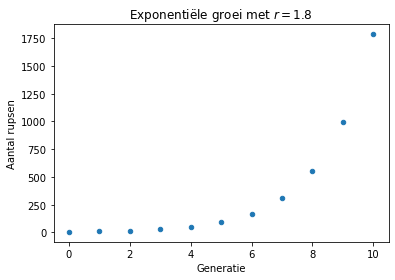

In [12]:
x_data = list(range(11))
y_data = [exponentieel_model(t=x) for x in x_data]
plt.scatter(x_data, y_data, 20)
plt.xlabel('Generatie')
plt.ylabel('Aantal rupsen')
plt.title('Exponentiële groei met $r = 1.8$')
plt.show()

De plaag groeit erg snel, wat verontrustend is. Als we nog verder in de tijd kijken, stellen we het volgende vast:

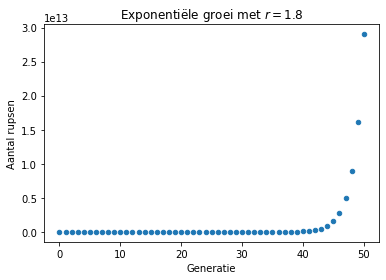

In [13]:
x_data = list(range(51))
y_data = [exponentieel_model(t=x) for x in x_data]
plt.scatter(x_data, y_data, 20)
plt.xlabel('Generatie')
plt.ylabel('Aantal rupsen')
plt.title('Exponentiële groei met $r = 1.8$')
plt.show()

We zien dat de populatiegrootte zonder enige belemmering verder aangroeit. Na $50$ generaties zijn er meer dan $29000000000000$ rupsen. Als we aannemen dat één rups ongeveer $3$ gram weegt, hebben we na $50$ generaties meer dan $87$ miljoen ton rupsen, het equivalent van $40$ miljoen nijlpaarden. Er zijn bijlange niet genoeg buxushagen in de wereld om dergelijke populaties te ondersteunen!

In de praktijk heeft elk ecosystem een bepaalde <em>draagkracht</em>, de hoeveelheid voedsel, water en ruimte die voorhanden is om een bepaalde populatie te ondersteunen. Onze rupsenpopulatie is gelimiteerd door het aantal planten die beschikbaar zijn als voedsel. De draagkracht wordt vaak voorgesteld door de letter $K$. Laat ons aannemen dat $K = 1000$. Onze tuin heeft dan genoeg buxussen om $1000$ rupsen te voeden, maar niet meer. Kunnen we ons model uitbreiden om hier rekening mee te houden? Dat zien we in het volgende hoofdstuk!

## De insecten voorbij

Groeimodellen vind je overal, niet enkel om de evolutie van insectenpopulaties te beschrijven, maar ook deze van kristallen, bacteriën, enzovoort. Een gekend voorbeeld van exponentiële groei kunnen we terugvinden in de geneeskunde. Tijdens de COVID-19 pandemie werd exponentiële groei vaak in de mond genomen om het aantal besmette personen te beschrijven. De befaamde $R_0$-waarde waar epidemiologen het meer dan eens over hadden komt ruwweg overeen met de groeisnelheid $r$ die wij hier bestudeerden. Via sociale distancing, mondmaskers en vaccinatie werd er alles aan gedaan om deze onder de $1$ te brengen. Wie volgende groeicurves bekijkt, ziet immers het gevaar van een exponentiële groei met $r > 1$: initieel neemt het aantal besmettingen gestaag toe, maar gaandeweg schiet dit aantal sneller en sneller de hoogte in.

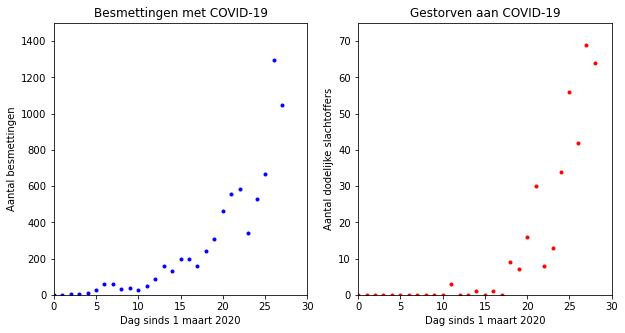

In [14]:
import pandas as pd

corona = pd.read_csv("covid.csv")
y_1 = list(corona["gevallen"])
y_2 = list(corona["doden"])
x = list(range(len(y_1)))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.xlim(0, 30)
plt.ylim(0, 1500)
plt.title("Besmettingen met COVID-19")
plt.xlabel("Dag sinds 1 maart 2020")
plt.ylabel("Aantal besmettingen")
plt.scatter(x, y_1, marker =".", color="blue")

plt.subplot(1, 2, 2)
plt.xlim(0, 30)
plt.ylim(0, 75)
plt.title("Gestorven aan COVID-19")
plt.xlabel("Dag sinds 1 maart 2020")
plt.ylabel("Aantal dodelijke slachtoffers")
plt.scatter(x, y_2, marker =".", color="red")
plt.show()

Wil je hier meer over weten? Via [deze link](https://www.dwengo.org/backend/api/learningObject/getWrapped?hruid=pn_expogroei&version=3&language=nl) kan je een interessante notepad bekijken, waarin onder meer het aantal besmettingen en het aantal ziekenhuisopnames in België weergegeven wordt als een functie van de tijd. Ook leer je hoe je de data kunt benaderen door een exponentiële curve!

Een bekende wet in de technologie is de zogenaamde "Wet van Moore", die stelt dat het aantal transistoren in een computerchip elke twee jaar verdubbelt. Dit wordt geïllustreerd in volgende grafiek, waarbij een logaritmische y-as gebruikt wordt:

![Moore](files/moore.png "Moore's Law")

Oneindige groei is vrijwel altijd onmogelijk: ooit moet je op de limieten van het systeem botsen. Zo stellen verschillende computerwetenschappers dat de wet van Moore zich niet kan blijven doorzetten, omdat ontwikkelaars vroeg of laat op fysische grenzen zullen botsen. Toch vormt een exponentieel model vaak een uitstekende beschrijving van het begin van de groei.

## Opdracht

TODO: een extra opdracht in het teken van exponentiële groei